In [1]:
import pandas as pd
import numpy as np
import sys
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import metrics

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import xgboost as xgb
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
import pickle



In [2]:
##setup google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
##setup path
root_path = '/content/drive/MyDrive/W210 - Capstone Project/data'

In [4]:
##import dataset
df_broadband_tr = pd.read_csv('/content/drive/MyDrive/W210 - Capstone Project/data/train_3.csv', encoding = 'ISO-8859-1')
df_broadband_test = pd.read_csv('/content/drive/MyDrive/W210 - Capstone Project/data/test_3.csv', encoding = 'ISO-8859-1')


## Machine Learning Model for Broadband training dataset



In [5]:
df_broadband_tr = df_broadband_tr.set_index('tract_geoid')
df_broadband_test = df_broadband_test.set_index('tract_geoid')

In [6]:
df_broadband_tr.head()

,Unnamed: 0,All_Provider_Count,MaxAdDown,MaxAdUp,Wired_Provider_Count,Satellite_Provider_Count,Fixed_Wireless_Provider_Count,All_Provider_Count_25,All_Provider_Count_100,Fixed_Wireless_Provider_Count_25,...,log_median_income,log_median_house_value,median_income_over_median_rent,median_income_over_median_house_value,pct_of_internet_users_with_broadband,log_median_income_over_log_median_house,pct_desktop_or_laptop,pct_smartphone,pct_only_smartphone,pct_tablet
tract_geoid,,,,,,,,,,,,,,,,,,,,,
6099000201,0,11,1000.0,1000.0,4.0,4,4.0,7.0,3.0,3.0,...,11.172546,12.667918,59.341118,0.224165,100.000000,0.881956,68.284076,80.811645,14.292016,54.741950
47125102002,1,7,1000.0,1000.0,3.0,4,0.0,5.0,4.0,0.0,...,11.113224,12.048249,51.697764,0.392576,99.164439,0.922393,96.990074,93.948127,1.953250,79.090618
22019001300,2,8,1000.0,1000.0,3.0,4,2.0,4.0,2.0,0.0,...,11.162147,12.062779,66.303202,0.406313,100.000000,0.925338,84.889780,85.611222,6.012024,68.777555
18083955400,3,11,1000.0,1000.0,5.0,4,3.0,6.0,3.0,1.0,...,10.388995,11.202316,50.940439,0.443383,100.000000,0.927397,65.481172,75.418410,10.564854,52.301255
39085206600,4,7,1000.0,1000.0,3.0,4,0.0,4.0,2.0,0.0,...,10.900178,11.663928,51.507605,0.465916,98.464164,0.934520,74.532020,67.980296,2.463054,52.216749


In [7]:
df_broadband_tr.shape


(55826, 203)

In [8]:
df_broadband_test.shape

(13947, 203)

In [9]:
df_broadband_tr.describe()

,Unnamed: 0,All_Provider_Count,MaxAdDown,MaxAdUp,Wired_Provider_Count,Satellite_Provider_Count,Fixed_Wireless_Provider_Count,All_Provider_Count_25,All_Provider_Count_100,Fixed_Wireless_Provider_Count_25,...,log_median_income,log_median_house_value,median_income_over_median_rent,median_income_over_median_house_value,pct_of_internet_users_with_broadband,log_median_income_over_log_median_house,pct_desktop_or_laptop,pct_smartphone,pct_only_smartphone,pct_tablet
count,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,...,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000,55826.000000
mean,27912.500000,10.656719,957.897019,629.729030,5.527424,3.996417,1.333554,5.085337,2.999893,0.655573,...,10.999802,12.221700,60.508040,0.332359,99.516694,0.901661,75.911962,78.749925,7.615102,57.937991
std,16115.722401,3.058830,152.595259,438.285021,2.677041,0.068151,1.444999,1.390270,1.188782,0.929290,...,0.461022,0.740413,21.704515,0.165234,0.890079,0.037318,14.286054,9.791230,6.136955,12.524106
min,0.000000,3.000000,2.000000,0.512000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,8.325791,9.210240,5.894772,0.014433,72.222222,0.685061,2.603369,10.483871,0.000000,6.317411
25%,13956.250000,8.000000,987.000000,50.000000,4.000000,4.000000,0.000000,4.000000,2.000000,0.000000,...,10.702435,11.704372,45.899438,0.222456,99.256813,0.880425,67.133688,72.638049,2.963984,49.611084
50%,27912.500000,10.000000,1000.000000,940.000000,5.000000,4.000000,1.000000,5.000000,3.000000,0.000000,...,10.993580,12.161598,57.336393,0.321160,100.000000,0.906645,77.999462,79.719145,6.208054,58.320951
75%,41868.750000,12.000000,1000.000000,1000.000000,7.000000,4.000000,2.000000,6.000000,4.000000,1.000000,...,11.302621,12.718597,71.797508,0.417278,100.000000,0.926328,87.088051,86.081764,10.781179,67.021646
max,55825.000000,38.000000,1000.000000,1000.000000,29.000000,5.000000,17.000000,16.000000,11.000000,8.000000,...,12.429220,14.508658,707.617647,5.813081,100.000000,1.191104,100.000000,100.000000,45.263560,92.727273


In [10]:
df_broadband_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55826 entries, 6099000201 to 26125131800
Columns: 203 entries, Unnamed: 0 to pct_tablet
dtypes: float64(130), int64(72), object(1)
memory usage: 86.9+ MB


### Broadband Variables exploration

In [11]:
broadband_vars = ['MaxAdDown',
                 'MaxAdUp',
                 'Wired_Provider_Count',
                 'Satellite_Provider_Count',
                 'Fixed_Wireless_Provider_Count',
                 'All_Provider_Count_25',
                 'All_Provider_Count_100',
                 'Fixed_Wireless_Provider_Count_25',
                 'Wired_Provider_Count_25',
                 'Satellite_Provider_Count_25',
                 'Fixed_Wireless_Provider_Count_100',
                 'Wired_Provider_Count_100',
                 'Satellite_Provider_Count_100',
                 'pct_internet',
                 'pct_internet_dial_up',
                 'pct_internet_broadband_any_type',
                 'pct_internet_cellular',
                 'pct_only_cellular',
                 'pct_internet_broadband_fiber',
                 'pct_internet_broadband_satellite',
                 'pct_internet_only_satellite',
                 'pct_internet_other',
                 'pct_internet_no_subscrp',
                 'pct_internet_none',
                 'pct_computer',
                 'pct_computer_with_dialup',
                 'pct_computer_with_broadband',
                 'pct_computer_no_internet',
                 'pct_no_computer',
                 'Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
                 'Form 477 All Terrestrial Broadband: Max Advertised Consumer Upload Speed (Mbps)',
                 'Ookla Median Download Speed (Mbps)',
                 'Ookla Median Upload Speed (Mbps)',
                 '0_5_providers',
                 '6_10_providers',
                 '11_15_providers',
                 '16_20_providers',
                 '20+_providers',
                 '0_25_MaxAdDown',
                 '25_99_MaxAdDown',
                 '99_499_MaxAdDown',
                 '499_inf_MaxAdDown',
                 '0_25_Ookla Median Download Speed (Mbps)',
                 '25_99_Ookla Median Download Speed (Mbps)',
                 '99_499_Ookla Median Download Speed (Mbps)',
                 '499_inf_Ookla Median Download Speed (Mbps)',
                 '0_25_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
                 '25_99_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
                 '99_499_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
                 '499_inf_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
                 'single_provider',
                 'SE',
                 'INFA',
                 'DDI',
                 'ruca_metro',
                 'ruca_micro',
                 'ruca_small_town',
                 'ruca_rural',
                 'Comcast_present',
                 'ATT_present',
                 'HughesNet_present',
                 'GCI_Comm_Corp_present',
                 'ViaSat_present',
                 'VSAT_present',
                 'Century_Link_present',
                 'Spectrum_present',
                 'Crown_Castle_present',
                 'Etheric_present',
                 'Frontier_Communications_present']

In [12]:
## get a list of numerical feature
numeric_feats = df_broadband_tr.dtypes[df_broadband_tr.dtypes == "float64"].index.values.tolist()
numeric_feats

['MaxAdDown',
 'MaxAdUp',
 'Wired_Provider_Count',
 'Fixed_Wireless_Provider_Count',
 'All_Provider_Count_25',
 'All_Provider_Count_100',
 'Fixed_Wireless_Provider_Count_25',
 'Wired_Provider_Count_25',
 'Satellite_Provider_Count_25',
 'Fixed_Wireless_Provider_Count_100',
 'Wired_Provider_Count_100',
 'Satellite_Provider_Count_100',
 'median_age_overall',
 'median_age_male',
 'median_age_female',
 'state',
 'county',
 'tract',
 'employment_rate',
 'median_income',
 'total_households',
 'ave_household_size',
 'ave_family_size',
 'pct_health_ins_children',
 'pct_health_ins_19_64',
 'pct_health_ins_65+',
 'total_population',
 'median_house_value',
 'pct_white',
 'pct_hisp_latino',
 'pct_black',
 'pct_native',
 'pct_asian',
 'pct_hi_pi',
 'pct_other_race',
 'pct_two+_race',
 'pct_rent_burdened',
 'poverty_rate',
 'pct_pop_bachelors+',
 'pct_pop_hs+',
 'pct_internet',
 'pct_internet_dial_up',
 'pct_internet_broadband_any_type',
 'pct_internet_cellular',
 'pct_only_cellular',
 'pct_internet_

In [13]:
other_feats = df_broadband_tr.dtypes[df_broadband_tr.dtypes != "float64"].index.values.tolist()
other_feats

['Unnamed: 0',
 'All_Provider_Count',
 'Satellite_Provider_Count',
 'NAME',
 'ALAND',
 'AWATER',
 '0_5_providers',
 '6_10_providers',
 '11_15_providers',
 '16_20_providers',
 '20+_providers',
 '0_25_MaxAdDown',
 '25_99_MaxAdDown',
 '99_499_MaxAdDown',
 '499_inf_MaxAdDown',
 '0_25_Ookla Median Download Speed (Mbps)',
 '25_99_Ookla Median Download Speed (Mbps)',
 '99_499_Ookla Median Download Speed (Mbps)',
 '499_inf_Ookla Median Download Speed (Mbps)',
 '0_25_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
 '25_99_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
 '99_499_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
 '499_inf_Form 477 All Terrestrial Broadband: Max Advertised Consumer Download Speed (Mbps)',
 'single_provider',
 'Primary RUCA Code - 1.0',
 'Primary RUCA Code - 2.0',
 'Primary RUCA Code - 4.0',
 'Primary RUCA Code - 10.0',
 'Primary RUCA Code - 7.0',
 'Primary RUC

### Train test split
linear regression on target variable = pct of high school degree + 

In [14]:
##drop some variables that are not numerical, highly correlated to dependent varible (bachelors degree)

to_drop = ['pct_pop_hs+','pct_pop_bachelors+', 'NAME','DDI','INFA','SE','pct_pop_some_college','pct_internet_none'	]
target = ['pct_pop_hs+']

X = df_broadband_tr.drop(to_drop, axis = 'columns', inplace=False)
y = df_broadband_tr[target]

##split into train and test 80/20 random split
from sklearn.model_selection import train_test_split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [16]:
X_train_all.shape

(44660, 195)

### Broadband Variables Set 1&2

In [17]:
br_important_vars = ['pct_internet',
'pct_only_cellular',
'pct_computing_device_no_internet',
'pct_internet_broadband_satellite',
'pct_computing_device_with_broadband']


In [18]:
br_interest_vars = ['pct_internet',
  'All_Provider_Count_25',
  'All_Provider_Count_100',
  'Ookla Median Download Speed (Mbps)',
  'pct_computing_device',
  'pct_internet_broadband_any_type']


In [19]:
important_cov = ['log_median_income', 
                 'pct_hisp_latino',
                 'ruca_metro',
                 'ruca_micro',
                 'ruca_small_town',
                 'ruca_rural',
                 'log_median_income_over_log_median_house',
                 'pct_pop_foreign_born',
                 'pct_pop_disability']

In [20]:
def regression_results(y_test, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_test, y_pred)
    mae=metrics.mean_absolute_error(y_test, y_pred) 
    mse=metrics.mean_squared_error(y_test, y_pred) 
    r2=metrics.r2_score(y_test, y_pred)
    adj_r2 = 1 - ( 1-r2 ) * ( len(y_test) - 1 ) / ( len(y_test) - X.shape[1] - 1 )


    print("The model performance for testing set")
    print("--------------------------------------")
    print('MAE is {}'.format(mae))
    print('MSE is {}'.format(mse))
    print('RMSE is {}'.format(mse**(1/2.0)))
    print('R2 score is {}'.format(r2))
    print('Adj R2 score is {}'.format(adj_r2))

### Baseline Model - log(median income)

In [21]:
#limit the dataset to only log(median income)

ind_var = ['log_median_income']
target = ['pct_pop_hs+']

X_train = X_train_all[ind_var]
X_test = X_test_all[ind_var]
y_train = y_train_all[target]
y_test = y_test_all[target]


In [22]:
## linear regression model using sklearn
lr = LinearRegression()
lr.fit(X_train, y_train)
## predict on x test 
y_pred = lr.predict(X_test)

In [23]:
# model evaluation for testing set
regression_results(y_test, y_pred)

The model performance for testing set
--------------------------------------
MAE is 8.94802099331186
MSE is 132.4111115283205
RMSE is 11.507002716968502
R2 score is 0.4630529011595057
Adj R2 score is 0.4535082626659873


### LR 1: Include all variables (except the ones dropped earlier)

In [24]:
## linear regression model using sklearn
lr = LinearRegression()
lr.fit(X_train_all, y_train_all)
## predict on x test 
y_pred = lr.predict(X_test_all)

In [25]:
## look at coeffcients
pd.DataFrame({"Feature":X.columns.tolist(),"Coefficients":lr.coef_[0]})

,Feature,Coefficients
0,Unnamed: 0,-8.427085e-07
1,All_Provider_Count,4.185857e-01
2,MaxAdDown,2.599617e-03
3,MaxAdUp,-1.698877e-05
4,Wired_Provider_Count,-6.208141e-01
...,...,...
190,log_median_income_over_log_median_house,-3.694351e+00
191,pct_desktop_or_laptop,4.121476e-01
192,pct_smartphone,1.490142e-01
193,pct_only_smartphone,5.149481e-02


In [26]:
lr.score(X_test_all,y_test_all)

0.8503546478038394

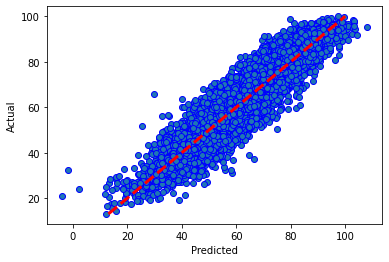

In [27]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test_all, edgecolors=(0, 0, 1))
ax.plot([y_test_all.min(), y_test_all.max()], [y_test_all.min(), y_test_all.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()


#### LR 1: Model evaluation metrics

In [28]:
# model evaluation for testing set
regression_results(y_test, y_pred)

The model performance for testing set
--------------------------------------
MAE is 4.7758417372521444
MSE is 36.902531854868606
RMSE is 6.074745414819341
R2 score is 0.8503546478038394
Adj R2 score is 0.8476945891276086


### LR 2: Model with high correlation variables (corr > |0.5|)

In [29]:
corr = df_broadband_tr.corr()
edu_corr = corr['pct_pop_hs+']

In [30]:
## find variables with |correlation| > 0.5 
high_corr =edu_corr[abs(edu_corr)>0.5]
high_corr.sort_values(ascending=False)

pct_pop_hs+                            1.000000
pct_pop_bachelors+                     0.888712
pct_desktop_or_laptop                  0.776303
pct_pop_income_gt_100k                 0.710661
pct_tablet                             0.698570
pct_computing_device_with_broadband    0.689616
log_median_income                      0.684769
pct_internet_broadband_any_type        0.683735
pct_internet                           0.683164
median_income                          0.676618
pct_internet_cellular                  0.639092
pct_computing_device                   0.638943
pct_pop_gt_200k                        0.636543
pct_pop_150k_thru_200k                 0.608908
log_median_house_value                 0.578137
pct_smartphone                         0.577029
pct_health_ins_19_64                   0.572022
median_rent                            0.512943
pct_pop_125k_thru_150k                 0.503278
pct_computing_device_no_internet      -0.521311
poverty_rate                          -0

In [31]:
#combine both positively and negatively correlated variables with corr >0.5
var_high_corr = high_corr.index.tolist()
print(var_high_corr)

['median_income', 'pct_health_ins_19_64', 'poverty_rate', 'pct_pop_bachelors+', 'pct_pop_hs+', 'pct_internet', 'pct_internet_broadband_any_type', 'pct_internet_cellular', 'pct_internet_none', 'pct_computing_device', 'pct_computing_device_with_broadband', 'pct_computing_device_no_internet', 'pct_no_computing_device', 'pct_pop_ssi_households', 'pct_pop_125k_thru_150k', 'pct_pop_150k_thru_200k', 'pct_pop_gt_200k', 'SE', 'INFA', 'DDI', 'pct_pop_income_lt_50k', 'pct_pop_income_lt_30k', 'pct_pop_income_gt_100k', 'median_rent', 'log_median_income', 'log_median_house_value', 'pct_desktop_or_laptop', 'pct_smartphone', 'pct_only_smartphone', 'pct_tablet']


In [32]:
#limit the dataset to only the relevant variables

ind_var = [e for e in var_high_corr if e not in to_drop]

target = ['pct_pop_hs+']

X_train = X_train_all[ind_var]
X_test = X_test_all[ind_var]
y_train = y_train_all[target]
y_test = y_test_all[target]

In [33]:
lr_2 = LinearRegression()
lr_2.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = lr_2.predict(X_test)

y_pred

array([[54.92531191],
       [51.71708133],
       [60.69185313],
       ...,
       [52.68924513],
       [44.19223803],
       [53.30435121]])

In [35]:
pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":lr_2.coef_[0]})

,Feature,Coefficients
0,median_income,-0.000154
1,pct_health_ins_19_64,0.278909
2,poverty_rate,-0.075842
3,pct_internet,0.171341
4,pct_internet_broadband_any_type,-0.264481
5,pct_internet_cellular,0.150283
6,pct_computing_device,-0.408473
7,pct_computing_device_with_broadband,0.649400
8,pct_computing_device_no_internet,0.673379
9,pct_no_computing_device,0.408473


#### LR 2: Model evaluation metrics

In [36]:
# model evaluation for testing set
regression_results(y_test, y_pred)

The model performance for testing set
--------------------------------------
MAE is 6.652276038003812
MSE is 71.14360096536953
RMSE is 8.434666618507784
R2 score is 0.7115019298720218
Adj R2 score is 0.7063736597102208


we can see that the metrics dropped pretty significantly.

### LR 3: Adding all broadband-related variables in addition to the above high correlation variables

In [37]:
#limit the dataset to only the relevant variables

for word in br_important_vars:
    if word not in ind_var:
        ind_var.append(word)

target = ['pct_pop_hs+']

X_train = X_train_all[ind_var]
X_test = X_test_all[ind_var]
y_train = y_train_all[target]
y_test = y_test_all[target]

In [38]:
ind_var

['median_income',
 'pct_health_ins_19_64',
 'poverty_rate',
 'pct_internet',
 'pct_internet_broadband_any_type',
 'pct_internet_cellular',
 'pct_computing_device',
 'pct_computing_device_with_broadband',
 'pct_computing_device_no_internet',
 'pct_no_computing_device',
 'pct_pop_ssi_households',
 'pct_pop_125k_thru_150k',
 'pct_pop_150k_thru_200k',
 'pct_pop_gt_200k',
 'pct_pop_income_lt_50k',
 'pct_pop_income_lt_30k',
 'pct_pop_income_gt_100k',
 'median_rent',
 'log_median_income',
 'log_median_house_value',
 'pct_desktop_or_laptop',
 'pct_smartphone',
 'pct_only_smartphone',
 'pct_tablet',
 'pct_only_cellular',
 'pct_internet_broadband_satellite']

In [39]:
lr_3 = LinearRegression()
lr_3.fit(X_train, y_train)
y_pred = lr_3.predict(X_test)
pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":lr_3.coef_[0]})

,Feature,Coefficients
0,median_income,-0.000154
1,pct_health_ins_19_64,0.268932
2,poverty_rate,-0.075397
3,pct_internet,0.210841
4,pct_internet_broadband_any_type,-0.332307
5,pct_internet_cellular,0.171590
6,pct_computing_device,-0.341737
7,pct_computing_device_with_broadband,0.559411
8,pct_computing_device_no_internet,0.566274
9,pct_no_computing_device,0.341737


#### LR3: Model evaluation metrics

In [40]:
# model evaluation for testing set
regression_results(y_test, y_pred)

The model performance for testing set
--------------------------------------
MAE is 6.620094885045002
MSE is 70.34384249362928
RMSE is 8.387123612635579
R2 score is 0.7147450715254484
Adj R2 score is 0.7096744506455452


As expected, these newly added boradband variables are not adding much improvement to the model.

### LR 4: Adding interesting broadband vars

In [41]:
#limit the dataset to only the relevant variables

for word in br_interest_vars:
    if word not in ind_var:
        ind_var.append(word)

target = ['pct_pop_hs+']

X_train = X_train_all[ind_var]
X_test = X_test_all[ind_var]
y_train = y_train_all[target]
y_test = y_test_all[target]

In [42]:
lr_4 = LinearRegression()
lr_4.fit(X_train, y_train)
y_pred = lr_4.predict(X_test)
pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":lr_4.coef_[0]})

,Feature,Coefficients
0,median_income,-0.000153
1,pct_health_ins_19_64,0.260819
2,poverty_rate,-0.078104
3,pct_internet,0.131695
4,pct_internet_broadband_any_type,-0.187035
5,pct_internet_cellular,0.165848
6,pct_computing_device,-0.356044
7,pct_computing_device_with_broadband,0.547555
8,pct_computing_device_no_internet,0.593027
9,pct_no_computing_device,0.356044


In [43]:
# model evaluation for testing set
regression_results(y_test, y_pred)

The model performance for testing set
--------------------------------------
MAE is 6.5713698591163885
MSE is 69.34203517345486
RMSE is 8.327186510067783
R2 score is 0.7188075518411565
Adj R2 score is 0.7138091446040576


### Use Cross-Validation to evaluate model performance

In [44]:
from sklearn.utils import shuffle
X_shuffle, y_shuffle = shuffle(X_train, y_train, random_state=42)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr_4, X_shuffle, y_shuffle,
                         scoring="neg_mean_squared_error",
                         cv=5, n_jobs=1)
rmse = np.sqrt(-scores)
print("RMSE values: ", np.round(rmse, 2))
print("RMSE average: ", np.mean(rmse))


RMSE values:  [8.4  8.36 8.37 8.42 8.4 ]
RMSE average:  8.390106210680138


## Random Forest

### RF 1: Include all variables

In [99]:
# Fitting Random Forest Regression to the dataset

# create regressor object
rf_rg = RandomForestRegressor(n_estimators = 250, random_state = 0)

# fit the regressor with x and y data
rf_rg.fit(X_train_all, y_train_all)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(n_estimators=250, random_state=0)

In [100]:
y_pred = rf_rg.predict(X_test_all)
y_pred

array([59.34173292, 49.92979449, 59.49057903, ..., 48.38987646,
       49.84626736, 57.13793928])

In [101]:
# model evaluation for testing set
regression_results(y_test, y_pred)

The model performance for testing set
--------------------------------------
MAE is 4.644292889322016
MSE is 35.132178474298506
RMSE is 5.927240375950557
R2 score is 0.8575336987206974
Adj R2 score is 0.8550012530735266


#### Feature importance

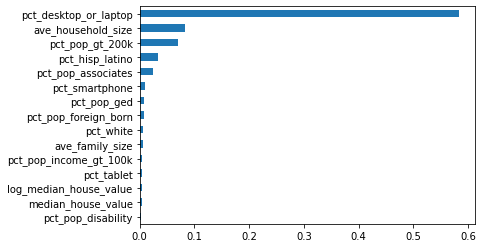

In [103]:
(pd.Series(rf_rg.feature_importances_, index=X_test_all.columns)
   .nlargest(15)[::-1]
   .plot(kind='barh')
   )  
   

In [104]:
top_vars_rf = (pd.Series(rf_rg.feature_importances_, index=X_test_all.columns).nlargest(15)[:-1])
print(top_vars_rf)

pct_desktop_or_laptop     0.582478
ave_household_size        0.082850
pct_pop_gt_200k           0.069829
pct_hisp_latino           0.033384
pct_pop_associates        0.025102
pct_smartphone            0.009010
pct_pop_ged               0.008345
pct_pop_foreign_born      0.007505
pct_white                 0.005731
ave_family_size           0.005119
pct_pop_income_gt_100k    0.004806
pct_tablet                0.004698
log_median_house_value    0.004446
median_house_value        0.004329
dtype: float64


### RF 2: Only the top 10 features + broadband var set 1

In [105]:
top_vars_rf_list = top_vars_rf.index.tolist()
print(top_vars_rf_list)

['pct_desktop_or_laptop', 'ave_household_size', 'pct_pop_gt_200k', 'pct_hisp_latino', 'pct_pop_associates', 'pct_smartphone', 'pct_pop_ged', 'pct_pop_foreign_born', 'pct_white', 'ave_family_size', 'pct_pop_income_gt_100k', 'pct_tablet', 'log_median_house_value', 'median_house_value']


In [106]:
#limit the dataset to only the relevant variables

ind_var = [e for e in top_vars_rf_list if e not in ('pct_pop_hs+','pct_pop_bachelors+')]
for word in br_important_vars:
    if word not in ind_var:
        ind_var.append(word)

for word in important_cov:
    if word not in ind_var:
        ind_var.append(word)

target = ['pct_pop_hs+']

X_train = X_train_all[ind_var]
X_test = X_test_all[ind_var]
y_train = y_train_all[target]
y_test = y_test_all[target]

In [107]:
ind_var

['pct_desktop_or_laptop',
 'ave_household_size',
 'pct_pop_gt_200k',
 'pct_hisp_latino',
 'pct_pop_associates',
 'pct_smartphone',
 'pct_pop_ged',
 'pct_pop_foreign_born',
 'pct_white',
 'ave_family_size',
 'pct_pop_income_gt_100k',
 'pct_tablet',
 'log_median_house_value',
 'median_house_value',
 'pct_internet',
 'pct_only_cellular',
 'pct_computing_device_no_internet',
 'pct_internet_broadband_satellite',
 'pct_computing_device_with_broadband',
 'log_median_income',
 'ruca_metro',
 'ruca_micro',
 'ruca_small_town',
 'ruca_rural',
 'log_median_income_over_log_median_house',
 'pct_pop_disability']

In [109]:
# Fitting Random Forest Regression to the dataset

# create regressor object
rf_rg2 = RandomForestRegressor(n_estimators = 250, random_state = 0)

# fit the regressor with x and y data
rf_rg2.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(n_estimators=250, random_state=0)

In [110]:
y_pred = rf_rg2.predict(X_test)
y_pred

array([59.53326832, 50.16464564, 56.00256048, ..., 48.79890725,
       51.27357262, 57.20446566])

In [111]:
# model evaluation for testing set
regression_results(y_test, y_pred)

The model performance for testing set
--------------------------------------
MAE is 4.76355498974902
MSE is 36.95822547680205
RMSE is 6.079327715858231
R2 score is 0.8501288017371769
Adj R2 score is 0.8474647284772634


In [112]:
top_vars_rf2 = (pd.Series(rf_rg2.feature_importances_, index=X_test.columns).nlargest(35)[:-1])
print(top_vars_rf2)

pct_desktop_or_laptop                      0.589378
ave_household_size                         0.091138
pct_pop_gt_200k                            0.075341
pct_hisp_latino                            0.039514
pct_pop_associates                         0.033234
pct_smartphone                             0.018886
pct_pop_ged                                0.015464
pct_pop_foreign_born                       0.014766
pct_white                                  0.014549
pct_tablet                                 0.011547
pct_pop_disability                         0.010819
ave_family_size                            0.010808
pct_pop_income_gt_100k                     0.010654
log_median_income                          0.009314
pct_internet_broadband_satellite           0.007637
log_median_income_over_log_median_house    0.007422
log_median_house_value                     0.007366
median_house_value                         0.007345
pct_only_cellular                          0.007187
pct_computin

In [113]:
pd.DataFrame({'Variables':top_vars_rf2.index, 'Importance':top_vars_rf2.values})


,Variables,Importance
0,pct_desktop_or_laptop,0.589378
1,ave_household_size,0.091138
2,pct_pop_gt_200k,0.075341
3,pct_hisp_latino,0.039514
4,pct_pop_associates,0.033234
5,pct_smartphone,0.018886
6,pct_pop_ged,0.015464
7,pct_pop_foreign_born,0.014766
8,pct_white,0.014549
9,pct_tablet,0.011547


### RF 3: Only the top 10 features + broadband var set 2

In [114]:
#limit the dataset to only the relevant variables

ind_var_rf3 = [e for e in top_vars_rf_list if e not in ('pct_pop_hs+','pct_pop_bachelors+')]
for word in br_interest_vars:
    if word not in ind_var_rf3:
        ind_var_rf3.append(word)

for word in important_cov:
    if word not in ind_var_rf3:
        ind_var_rf3.append(word)
        
target = ['pct_pop_hs+']

X_train = X_train_all[ind_var_rf3]
X_test = X_test_all[ind_var_rf3]
y_train = y_train_all[target]
y_test = y_test_all[target]

In [115]:
ind_var_rf3

['pct_desktop_or_laptop',
 'ave_household_size',
 'pct_pop_gt_200k',
 'pct_hisp_latino',
 'pct_pop_associates',
 'pct_smartphone',
 'pct_pop_ged',
 'pct_pop_foreign_born',
 'pct_white',
 'ave_family_size',
 'pct_pop_income_gt_100k',
 'pct_tablet',
 'log_median_house_value',
 'median_house_value',
 'pct_internet',
 'All_Provider_Count_25',
 'All_Provider_Count_100',
 'Ookla Median Download Speed (Mbps)',
 'pct_computing_device',
 'pct_internet_broadband_any_type',
 'log_median_income',
 'ruca_metro',
 'ruca_micro',
 'ruca_small_town',
 'ruca_rural',
 'log_median_income_over_log_median_house',
 'pct_pop_disability']

In [116]:
# Fitting Random Forest Regression to the dataset

# create regressor object
rf_rg3 = RandomForestRegressor(n_estimators = 250, random_state = 0)

# fit the regressor with x and y data
rf_rg3.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(n_estimators=250, random_state=0)

In [117]:
y_pred = rf_rg3.predict(X_test)
y_pred

array([59.57644391, 48.88676599, 56.4366159 , ..., 48.59227293,
       51.75877378, 57.33986621])

In [118]:
# model evaluation for testing set
regression_results(y_test, y_pred)

The model performance for testing set
--------------------------------------
MAE is 4.748044626332708
MSE is 36.642652077117006
RMSE is 6.05331744394072
R2 score is 0.8514084996377256
Adj R2 score is 0.8487671739703926


In [119]:
top_vars_rf3 = (pd.Series(rf_rg3.feature_importances_, index=X_test.columns).nlargest(25)[:-1])
print(top_vars_rf3)

pct_desktop_or_laptop                      0.589349
ave_household_size                         0.091234
pct_pop_gt_200k                            0.075459
pct_hisp_latino                            0.039623
pct_pop_associates                         0.033370
pct_smartphone                             0.018090
pct_pop_ged                                0.015618
pct_pop_foreign_born                       0.014803
pct_white                                  0.014658
pct_tablet                                 0.011638
pct_pop_disability                         0.010911
ave_family_size                            0.010888
pct_pop_income_gt_100k                     0.010857
log_median_income                          0.009469
Ookla Median Download Speed (Mbps)         0.007902
median_house_value                         0.007554
log_median_income_over_log_median_house    0.007528
log_median_house_value                     0.007316
pct_computing_device                       0.007256
pct_internet

In [97]:
pd.DataFrame({'Variables':top_vars_rf3.index, 'Importance':top_vars_rf3.values})


,Variables,Importance
0,pct_desktop_or_laptop,0.589414
1,ave_household_size,0.091468
2,pct_pop_gt_200k,0.075185
3,pct_hisp_latino,0.039426
4,pct_pop_associates,0.033318
5,pct_smartphone,0.018203
6,pct_pop_ged,0.015573
7,pct_pop_foreign_born,0.014750
8,pct_white,0.014620
9,pct_tablet,0.011621


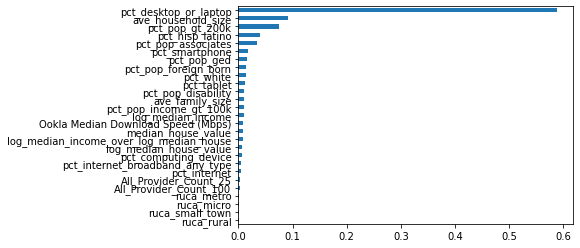

In [120]:
(pd.Series(rf_rg3.feature_importances_, index=X_test.columns)
   .nlargest(30)[::-1]
   .plot(kind='barh')
   )  

#### Hyperparameter Tuning

In [ ]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_rg3.get_params())

In [ ]:
random_forest_tuning = RandomForestRegressor(random_state = 0)

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto'],
    'max_depth' : [2,5,10],
    'criterion' :['squared_error']
}

In [ ]:
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=5)
GSCV.fit(X_train, y_train)

In [ ]:
GSCV.best_params_

In [ ]:
random_forest_tuned = RandomForestRegressor(criterion= 'squared_error',max_depth= 10,max_features= 'auto',n_estimators =500,random_state = 0)
random_forest_tuned.fit(X_train, y_train)
y_pred = random_forest_tuned.predict(X_test)

In [ ]:
# model evaluation for testing set
regression_results(y_test, y_pred)

## XGBoost

### XGB 1: Include all variables

In [167]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 2500)

In [47]:
## Here we will tune the below hyperparameters that are usually having a big impact on performance
params = {
    # Parameters that we are going to tune.
    'max_depth':3,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 0.3,
    'learning_rate' : 0.1,
    'alpha': 10,
    'n_estimator': 2500,
    # Other parameters
    'objective':'reg:squarederror',
}

In [178]:
xg_reg.fit(X_train_all,y_train_all)
y_pred = xg_reg.predict(X_test_all)

In [179]:
# model evaluation for testing set
regression_results(y_test_all, y_pred)

The model performance for testing set
--------------------------------------
MAE is 3.963994999452852
MSE is 25.51455848133247
RMSE is 5.0511937679456
R2 score is 0.8965346035040465
Adj R2 score is 0.894695428270071


#### Feature Importance

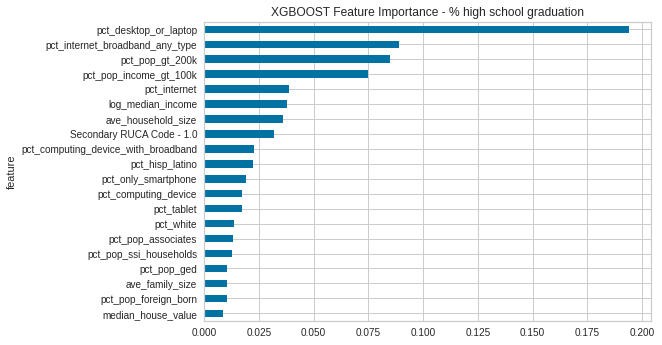

In [180]:
(pd.Series(xg_reg.feature_importances_, index=X_test_all.columns)
   .nlargest(20)[::-1]
   .plot(kind='barh',title="XGBOOST Feature Importance - % high school graduation", xlabel="feature")
   )  


### XGB 2: Only the top 15 features + broadband var set 1

In [181]:
top_vars = (pd.Series(xg_reg.feature_importances_, index=X_test_all.columns).nlargest(20)[:-1])
print(top_vars)

pct_desktop_or_laptop                  0.194114
pct_internet_broadband_any_type        0.088726
pct_pop_gt_200k                        0.084749
pct_pop_income_gt_100k                 0.074614
pct_internet                           0.038819
log_median_income                      0.037811
ave_household_size                     0.035961
Secondary RUCA Code - 1.0              0.031867
pct_computing_device_with_broadband    0.022845
pct_hisp_latino                        0.022080
pct_only_smartphone                    0.019007
pct_computing_device                   0.017474
pct_tablet                             0.017080
pct_white                              0.013387
pct_pop_associates                     0.013262
pct_pop_ssi_households                 0.012639
pct_pop_ged                            0.010479
ave_family_size                        0.010439
pct_pop_foreign_born                   0.010405
dtype: float32


In [182]:
top_vars_list_xg = top_vars.index.tolist()
print(top_vars_list_xg)

['pct_desktop_or_laptop', 'pct_internet_broadband_any_type', 'pct_pop_gt_200k', 'pct_pop_income_gt_100k', 'pct_internet', 'log_median_income', 'ave_household_size', 'Secondary RUCA Code - 1.0', 'pct_computing_device_with_broadband', 'pct_hisp_latino', 'pct_only_smartphone', 'pct_computing_device', 'pct_tablet', 'pct_white', 'pct_pop_associates', 'pct_pop_ssi_households', 'pct_pop_ged', 'ave_family_size', 'pct_pop_foreign_born']


In [183]:
#limit the dataset to only the relevant variables

ind_var = [e for e in top_vars_list_xg if e not in to_drop]
for word in br_important_vars:
    if word not in ind_var:
        ind_var.append(word)

for word in important_cov:
    if word not in ind_var:
        ind_var.append(word)

target = ['pct_pop_hs+']

X_train = X_train_all[ind_var]
X_test = X_test_all[ind_var]
y_train = y_train_all[target]
y_test = y_test_all[target]

In [184]:
ind_var

['pct_desktop_or_laptop',
 'pct_internet_broadband_any_type',
 'pct_pop_gt_200k',
 'pct_pop_income_gt_100k',
 'pct_internet',
 'log_median_income',
 'ave_household_size',
 'Secondary RUCA Code - 1.0',
 'pct_computing_device_with_broadband',
 'pct_hisp_latino',
 'pct_only_smartphone',
 'pct_computing_device',
 'pct_tablet',
 'pct_white',
 'pct_pop_associates',
 'pct_pop_ssi_households',
 'pct_pop_ged',
 'ave_family_size',
 'pct_pop_foreign_born',
 'pct_only_cellular',
 'pct_computing_device_no_internet',
 'pct_internet_broadband_satellite',
 'ruca_metro',
 'ruca_micro',
 'ruca_small_town',
 'ruca_rural',
 'log_median_income_over_log_median_house',
 'pct_pop_disability']

In [185]:
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

In [186]:
regression_results(y_test, y_pred)

The model performance for testing set
--------------------------------------
MAE is 4.709789170517244
MSE is 36.20593923699337
RMSE is 6.017137129648399
R2 score is 0.8531794363047789
Adj R2 score is 0.8505695903685375


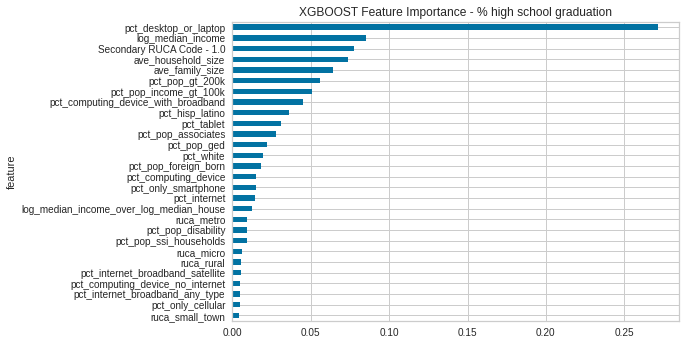

In [187]:
(pd.Series(xg_reg.feature_importances_, index=X_test.columns)
   .nlargest(50)[::-1]
   .plot(kind='barh',title="XGBOOST Feature Importance - % high school graduation", xlabel="feature")
   ) 

In [188]:
top_vars = pd.Series(xg_reg.feature_importances_, index=X_test.columns).nlargest(50)[:-1]
pd.DataFrame({'Variables':top_vars.index, 'Importance':top_vars.values})


,Variables,Importance
0,pct_desktop_or_laptop,0.271306
1,log_median_income,0.085417
2,Secondary RUCA Code - 1.0,0.077505
3,ave_household_size,0.074046
4,ave_family_size,0.064317
5,pct_pop_gt_200k,0.056078
6,pct_pop_income_gt_100k,0.050447
7,pct_computing_device_with_broadband,0.045081
8,pct_hisp_latino,0.036372
9,pct_tablet,0.031180


### XGB3: Only the top 10 features + broadband var set 2

In [189]:
#limit the dataset to only the relevant variables

ind_var = [e for e in top_vars_list_xg if e not in to_drop]
for word in br_interest_vars:
    if word not in ind_var:
        ind_var.append(word)

for word in important_cov:
    if word not in ind_var:
        ind_var.append(word)
        
target = ['pct_pop_hs+']

X_train = X_train_all[ind_var]
X_test = X_test_all[ind_var]
y_train = y_train_all[target]
y_test = y_test_all[target]

In [190]:
ind_var

['pct_desktop_or_laptop',
 'pct_internet_broadband_any_type',
 'pct_pop_gt_200k',
 'pct_pop_income_gt_100k',
 'pct_internet',
 'log_median_income',
 'ave_household_size',
 'Secondary RUCA Code - 1.0',
 'pct_computing_device_with_broadband',
 'pct_hisp_latino',
 'pct_only_smartphone',
 'pct_computing_device',
 'pct_tablet',
 'pct_white',
 'pct_pop_associates',
 'pct_pop_ssi_households',
 'pct_pop_ged',
 'ave_family_size',
 'pct_pop_foreign_born',
 'All_Provider_Count_25',
 'All_Provider_Count_100',
 'Ookla Median Download Speed (Mbps)',
 'ruca_metro',
 'ruca_micro',
 'ruca_small_town',
 'ruca_rural',
 'log_median_income_over_log_median_house',
 'pct_pop_disability']

In [191]:
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

In [192]:
regression_results(y_test, y_pred)

The model performance for testing set
--------------------------------------
MAE is 4.64906981759142
MSE is 35.102884012404395
RMSE is 5.924768688514717
R2 score is 0.857652492197654
Adj R2 score is 0.8551221581938748


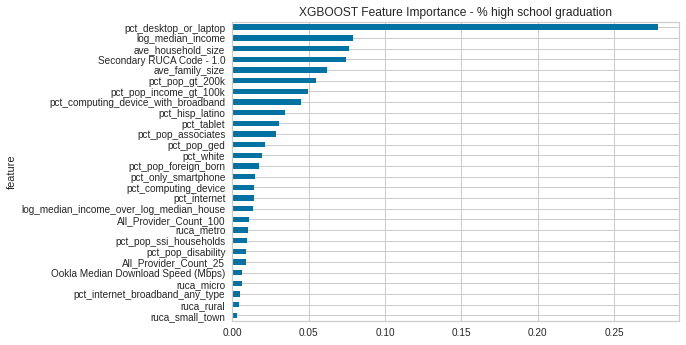

In [193]:
(pd.Series(xg_reg.feature_importances_, index=X_test.columns)
   .nlargest(90)[::-1]
   .plot(kind='barh',title="XGBOOST Feature Importance - % high school graduation", xlabel="feature")
   ) 

In [195]:
top_vars = pd.Series(xg_reg.feature_importances_, index=X_test.columns).nlargest(50)[:-1]
pd.DataFrame({'Variables':top_vars.index, 'Importance':top_vars.values})

,Variables,Importance
0,pct_desktop_or_laptop,0.278462
1,log_median_income,0.078832
2,ave_household_size,0.076203
3,Secondary RUCA Code - 1.0,0.074543
4,ave_family_size,0.061827
5,pct_pop_gt_200k,0.054456
6,pct_pop_income_gt_100k,0.049721
7,pct_computing_device_with_broadband,0.044609
8,pct_hisp_latino,0.034456
9,pct_tablet,0.030722


#### Hyperparameter Tuning

In [70]:
params = { 'max_depth': [5, 10],
           'learning_rate': [0.1,0.5],
           'n_estimators': [2500,3000],
           'colsample_bytree': [0.3, 0.7]}

regressor_tuned = xgb.XGBRegressor()

regress = RandomizedSearchCV(estimator=regressor_tuned, 
                             param_distributions=params,
                             scoring='neg_mean_squared_error', 
                             verbose=10,
                             n_iter = 20,
                             cv = 3,
                             random_state=42)

regress.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3; 1/16] START colsample_bytree=0.3, learning_rate=0.1, max_depth=5, n_estimators=2500
[15:21:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/3; 1/16] END colsample_bytree=0.3, learning_rate=0.1, max_depth=5, n_estimators=2500;, score=-42.300 total time=  56.8s
[CV 2/3; 1/16] START colsample_bytree=0.3, learning_rate=0.1, max_depth=5, n_estimators=2500
[15:22:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 2/3; 1/16] END colsample_bytree=0.3, learning_rate=0.1, max_depth=5, n_estimators=2500;, score=-41.445 total time=  57.2s
[CV 3/3; 1/16] START colsample_bytree=0.3, learning_rate=0.1, max_depth=5, n_estimators=2500
[15:23:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 3/3; 1/16] END colsampl

RandomizedSearchCV(cv=3, estimator=XGBRegressor(), n_iter=20,
                   param_distributions={'colsample_bytree': [0.3, 0.7],
                                        'learning_rate': [0.1, 0.5],
                                        'max_depth': [5, 10],
                                        'n_estimators': [2500, 3000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=10)

In [71]:
print("Best parameters:", regress.best_params_)
print("Lowest RMSE: ", (-regress.best_score_)**(1/2.0))
y_pred = regress.predict(X_test)

regression_results(y_test, y_pred)

Best parameters: {'n_estimators': 2500, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.3}
Lowest RMSE:  6.480722261737316
The model performance for testing set
--------------------------------------
MAE is 5.007187550008043
MSE is 40.65796410944728
RMSE is 6.376359785131896
R2 score is 0.8351258015936273
Adj R2 score is 0.8321950387231403


#Best Model

### So far, best model is XGB with broadband set 2



In [196]:
## using actual test dataset

X_test= df_broadband_test[ind_var]
y_test= df_broadband_test[target]

In [197]:
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

In [198]:
# model evaluation for testing set
regression_results(y_test, y_pred)

The model performance for testing set
--------------------------------------
MAE is 4.60918435661917
MSE is 34.61040257416187
RMSE is 5.883060646819976
R2 score is 0.8618421636294153
Adj R2 score is 0.8598829767999292


In [199]:
with open('education_xgb_model.pkl', 'wb') as file:
    pickle.dump(xg_reg, file)

# Error Analysis

In [200]:
## transfer to np array for error analysis

X_train_1 = np.squeeze(np.asarray(X_train))
y_train_1 = np.squeeze(np.asarray(y_train))
X_test_1 = np.squeeze(np.asarray(X_test))
y_test_1 = np.squeeze(np.asarray(y_test))

In [201]:
xg_reg.fit(X_train_1,y_train_1)
y_pred_1 = xg_reg.predict(X_test_1)

In [202]:
# model evaluation for testing set
regression_results(y_test_1, y_pred_1)

The model performance for testing set
--------------------------------------
MAE is 4.60918435661917
MSE is 34.61040257416187
RMSE is 5.883060646819976
R2 score is 0.8618421636294153
Adj R2 score is 0.8598829767999292


In [203]:
## import error analysis library
from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import cooks_distance
import scipy.stats as stats

## Residual plot

The residuals plot shows the difference between residuals on the vertical axis and the dependent variable on the horizontal axis, allowing you to detect regions within the target that may be susceptible to more or less error.

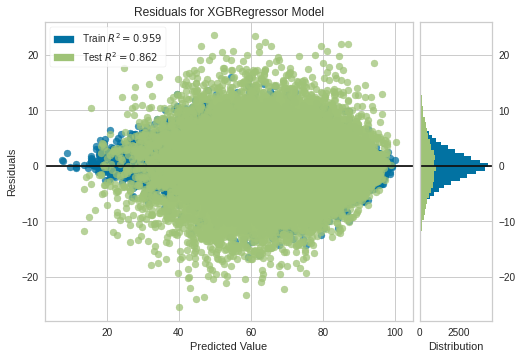

In [204]:
visualizer = ResidualsPlot(xg_reg)

visualizer.fit(X_train_1, y_train_1)  # Fit the training data to the visualizer
visualizer.score(X_test_1, y_test_1)  # Evaluate the model on the test data
visualizer.show()  

### Interpretations

In the case above, we see a fairly random, uniform distribution of the residuals against the target in two dimensions. This seems to indicate that our model is performing well. We can also see from the histogram that our error is normally distributed around zero, which also generally indicates a well fitted model.

## Prediction Error Plot

A prediction error plot shows the actual targets from the dataset against the predicted values generated by our model. This allows us to see how much variance is in the model. Data scientists can diagnose regression models using this plot by comparing against the 45 degree line, where the prediction exactly matches the model.


Prediction Error Plot


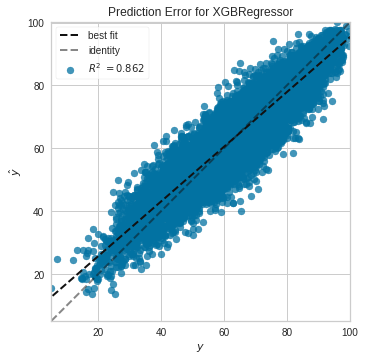

PredictionError(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e70522e90>,
                estimator=XGBRegressor(alpha=10, colsample_bytree=0.3,
                                       max_depth=5, n_estimators=2500,
                                       objective='reg:squarederror'))


In [205]:
# Making the Prediction Error Plot
print("\nPrediction Error Plot")
print(prediction_error(xg_reg, X_train_1, y_train_1, X_test_1, y_test_1))


### Interpretations

We can see that most of the points are on a straight line. We can compare this plot against the 45-degree line, where the prediction exactly matches the model. In general, the predictions follow the actualS.

## Cook's distance

Cook’s Distance is a measure of how influential an instance is to the computation of a regression, e.g. if the instance is removed would the estimated coeficients of the underlying model be substantially changed? Because of this, Cook’s Distance is generally used to detect outliers in standard, OLS regression. In fact, a general rule of thumb is that D(i) > 4/n is a good threshold for determining highly influential points as outliers and this visualizer can report the percentage of data that is above that threshold.

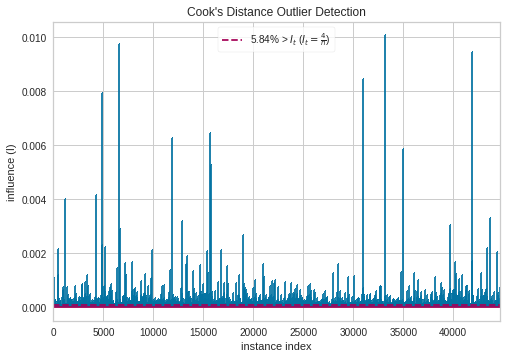

CooksDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e701c6250>)

In [208]:
cooks_distance(
    X_train_1, y_train_1,
    draw_threshold=True,
    linefmt="C0-", markerfmt=","
)

In particular, there are several (5.76%）of the observations with Cook’s distance values that are relatively higher than the others.

## Q-Q plot

To check the assumption of the normality of the data generating process, we can use Q-Q plot of the normalized residuals.

Text(0.5, 1.0, 'Normal Q-Q Plot')

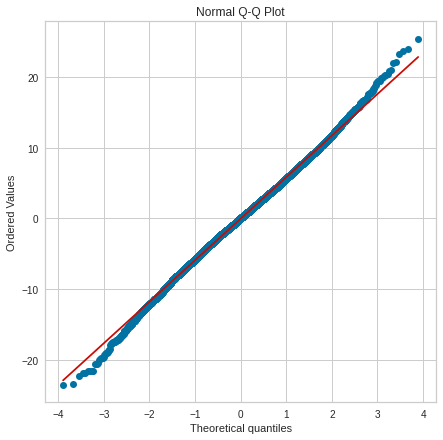

In [209]:
residuals = y_test["pct_pop_hs+"] - y_pred.reshape(-1)
residuals

plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

## Interpretations

We can see that the residuals are fitted to the line, although there are some outliers found at both end